## Overview<br>
The purpose of this analysis is to help the non-profit foundation Alphabet Soup determine if applicants will be successful by creating an algorithm that can help predict the outcome. 


## Preprocessing

In [133]:
import matplotlib.pyplot as plt

In [134]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


Cleaning the data

In [135]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [136]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

Reviewing the data for binning. Here the we will be finding the cut off amount where the largest gap exists.

In [137]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [138]:
#Since between 528 and 156 there seems to be a large gap, 520 will be used as the cutoff value.
app_vc = application_df.APPLICATION_TYPE.value_counts()
app_vc[app_vc > 520]
application_types_to_replace = list(app_vc[app_vc < 520].index)
application_types_to_replace

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T15', 'T29', 'T17']

In [139]:
# Choose a cutoff value and create a list of application types to be replaced (cutoff number was chosen above).
# After choosing the cutoff amount, a for loop is used in order to to replace the other amounts with "Other".
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

Plotting density to find the cutoff value for CLASSIFICATION.

(0.0, 3000.0)

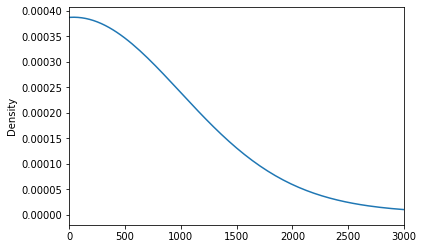

In [140]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
class_vc = application_df['CLASSIFICATION'].value_counts()
class_vc.plot.density()
plt.xlim(left = 0, right=3000)

In [141]:
classifications_to_replace = list(class_vc[class_vc < 900].index)
classifications_to_replace

['C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1278',
 'C1238',
 'C1237',
 'C1235',
 'C7210',
 'C2400',
 'C4100',
 'C1720',
 'C1600',
 'C1257',
 'C1260',
 'C0',
 'C2710',
 'C1246',
 'C1267',
 'C1234',
 'C3200',
 'C1256',
 'C1245',
 'C1283',
 'C3700',
 'C4500',
 'C2500',
 'C2190',
 'C1580',
 'C2380',
 'C1732',
 'C2570',
 'C1820',
 'C1570',
 'C4200',
 'C2561',
 'C5200',
 'C2150',
 'C1728',
 'C1900',
 'C4120',
 'C1248',
 'C1236',
 'C2600',
 'C2170',
 'C8210',
 'C6100',
 'C1370']

In [142]:
len(classifications_to_replace)/len(class_vc)

0.9295774647887324

In [143]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  already did the density version to check.

In [144]:
# Choose a cutoff value and create a list of classifications to be replaced (cutoff value was selected above from)
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [145]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
encoded_df = pd.get_dummies(application_df)
encoded_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M

Splitting the data to prep it for the test and train.

In [146]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = encoded_df['IS_SUCCESSFUL']
X = encoded_df.drop(columns = ['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


Using the StandardScaler

In [147]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [148]:
X_test_scaled

array([[ 1.39430557e-02, -3.33676580e-02, -8.91865111e-02, ...,
        -6.98784891e-02,  2.78942470e-02, -2.78942470e-02],
       [ 1.39430557e-02,  2.86802949e-02, -8.91865111e-02, ...,
         1.43105555e+01,  2.78942470e-02, -2.78942470e-02],
       [ 1.39430557e-02, -3.34843874e-02, -8.91865111e-02, ...,
        -6.98784891e-02,  2.78942470e-02, -2.78942470e-02],
       ...,
       [ 1.39430557e-02, -3.34843874e-02, -8.91865111e-02, ...,
        -6.98784891e-02,  2.78942470e-02, -2.78942470e-02],
       [ 1.39430557e-02, -3.34843874e-02, -8.91865111e-02, ...,
        -6.98784891e-02,  2.78942470e-02, -2.78942470e-02],
       [ 1.39430557e-02, -3.34843874e-02, -8.91865111e-02, ...,
        -6.98784891e-02,  2.78942470e-02, -2.78942470e-02]])

*   **What variable(s) are considered the target(s) for your model?**<br>
The Is_Successful variable from the dataset was used as the target for the model.
*   **What variable(s) are considered to be the features for your model?**<br>The following variables from the dataset were used as the features: APPLICATION_TYPE, AFFILIATION, CLASSIFICATION, USE_CASE, ORGANIZATION, STATUS, INCOME_AMT, SPECIAL_CONSIDERATIONS, ASK_AMT
*   **What variable(s) are neither targets nor features, and should be removed from the input data?** <br> After further analyzing the dataset, I believe STATUS, and SPECIAL_CONSIDERATIONS features could be removed. Compared to the rest of the other features, these two only had two unique values while the others contained four or more values. These two features would also not be considered the target since our target to determine success would be the Is_Successful variable. 

## Compile, Train and Evaluate the Model

In [149]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
num_input = len(X_train_scaled[0])
num_h1 = 80
num_h2 = 30
nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(input_dim=num_input, units=num_h1, activation='relu'))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=num_h2, activation='relu'))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 80)                3520      
                                                                 
 dense_19 (Dense)            (None, 30)                2430      
                                                                 
 dense_20 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [150]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



*   **How many neurons, layers, and activation functions did you select for your neural network model, and why?**<br>A total of three layers, three neurons, and two types of activation functions were used for the neural network. For the first and second layers the activation ReLu was applied. ReLu will only focus on the max(0, x) so this means the data will be processed in a simpler and faster manner to prevent exponential growth. Since Sigmoid focuses between 0 to 1, it was applied on the last layer for the output probability.
*   **Were you able to achieve the target model performance?**<br>Unfortunately, the model underperformed with an accuracy below 75%.
*   **What steps did you take to try and increase model performance?**<br>Some of the steps to try and improve the performance was to increase and decrease the epochs. After noticing that there wasn’t a difference, the next step was to remove unnecessary features from the dataset. Removing the features did not improve the performance so I decided to adjust the CLASSIFICATION binning and did not notice a significant change. 




In [151]:
# Train the model
#  YOUR CODE GOES HERE
fit_nn = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5700 - accuracy: 0.7229
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5548 - accuracy: 0.7294
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5525 - accuracy: 0.7310
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5513 - accuracy: 0.7324
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5491 - accuracy: 0.7331
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5488 - accuracy: 0.7338
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5479 - accuracy: 0.7334
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5472 - accuracy: 0.7341
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5465 - accuracy: 0.7353
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5464 - accura

In [152]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5543 - accuracy: 0.7247 - 399ms/epoch - 1ms/step
Loss: 0.554315984249115, Accuracy: 0.7246647477149963


In [153]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
nn.save('AlphabetSoupCharity.h5')

In [154]:
nn_to = tf.keras.models.load_model('AlphabetSoupCharity.h5')

## Summary
Overall, the model reached an accuracy of 72% with a loss of about 56%. I would recommend optimizing the model further by including the NAME feature to see if the accuracy would change. If the accuracy cannot be reached, I would also suggest trying a simpler model like Radom Forest to see if the results will improve. 